<a href="https://colab.research.google.com/github/s2cretjuju/first-repository/blob/master/ds6/DL/%5B%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%5D_20251202_%EB%94%A5%EB%9F%AC%EB%8B%9D(1)_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EA%B3%BC_%EA%B0%80%EC%9C%84%EB%B0%94%EC%9C%84%EB%B3%B4%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**[프로젝트] 인공지능과 가위바위보 하기**

**📝회고**

훈련용 이미지는 왼손으로 각 100장씩, 총 300장을 사용

테스트 이미지는 오른손으로 각 100장씩, 총 300장을 사용

---

[n_channel_1 = 32 | n_channel_2 = 64 | n_dense = 64 | n_train_epoch = 10]

10/10 - 0s - 25ms/step - accuracy: 0.6500 - loss: 1.1109

test_loss: 1.1109294891357422

test_accuracy: 0.6499999761581421

위의 파라미터를 사용했을 때, 가장 높은 성능이 나옴

---

이것 또한 좋은 성능은 아닌데, 그 이유에 대해 생각해보자면

-> 다양한 각도와 거리에서 사진 촬영을 진행하라는 말에 정말 가까이서도 찍고 아주 멀리서도 촬영함

-> 픽셀이 28 x 28로 매우 작은 해상도이기 때문에!!! 가위바위보 형태를 구분하기 매우매우 어려울 것임 (위에 예시 사진을 불러온 것으로 확인 가능)

-> 300장이면 데이터가 충분하지 않을 수도 있다

라고 생각해봤음

#**1. 라이브러리 및 데이터 호출**

In [ ]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.19.0
2.0.2


In [ ]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [ ]:
import os
import glob
from PIL import Image

def resize_images(img_path):
    # 'glob' 함수는 지정된 경로의 모든 JPG 파일을 찾습니다.
    images = glob.glob(img_path + "/*.jpg")

    print(len(images), " images to be resized.")
    # 파일이 없는 경우, 이 시점에서 0이 출력됩니다.

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        # Image.ANTIALIAS는 PIL 최신 버전에서는 Deprecated(비추천)되었을 수 있습니다.
        # Image.Resampling.LANCZOS 또는 Image.LANCZOS를 사용하는 것이 좋습니다.
        # 호환성을 위해 Image.LANCZOS로 변경합니다. (또는 단순히 Image.Resampling.LANCZOS)
        try:
            new_img = old_img.resize(target_size, Image.LANCZOS)
        except AttributeError:
            # 구버전 PIL을 위한 대체 (혹은 단순한 resize)
            new_img = old_img.resize(target_size, Image.ANTIALIAS)

        # 기존 파일을 덮어씁니다.
        new_img.save(img, "JPEG")

    print(len(images), " images resized.")

# --- 경로 설정 부분 수정 ---

# ⚠️ 중요: 'rock_scissor_paper' 디렉토리가 '/content/' 바로 아래에 있고,
# 그 안에 'scissor' 디렉토리가 있으며, 그 안에 JPG 파일이 있는지 확인하세요.
# 코랩에서 파일을 업로드했다면 보통 이런 구조입니다.
base_dir = "/content/rock_scissor_paper/" # 기본 디렉토리 경로
scissor_dir_path = base_dir + "scissor"   # 가위 이미지 경로

print(f"이미지 검색 경로: {scissor_dir_path}")

# 디렉토리가 실제로 존재하는지 확인하는 것도 좋습니다.
if not os.path.isdir(scissor_dir_path):
    print(f"경로가 존재하지 않습니다. 파일을 다시 확인하거나 경로를 수정하세요: {scissor_dir_path}")
else:
    resize_images(scissor_dir_path)

print("가위 이미지 resize 완료!")

이미지 검색 경로: /content/rock_scissor_paper/scissor
100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [ ]:
base_dir = "/content/rock_scissor_paper/" # 기본 디렉토리 경로
rock_dir_path = base_dir + "rock"   # 바위 이미지 경로

print(f"이미지 검색 경로: {rock_dir_path}")

# 디렉토리가 실제로 존재하는지 확인하는 것도 좋습니다.
if not os.path.isdir(rock_dir_path):
    print(f"경로가 존재하지 않습니다. 파일을 다시 확인하거나 경로를 수정하세요: {rock_dir_path}")
else:
    resize_images(rock_dir_path)

print("바위 이미지 resize 완료!")

이미지 검색 경로: /content/rock_scissor_paper/rock
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [ ]:
base_dir = "/content/rock_scissor_paper/" # 기본 디렉토리 경로
paper_dir_path = base_dir + "paper"   # 보 이미지 경로

print(f"이미지 검색 경로: {paper_dir_path}")

# 디렉토리가 실제로 존재하는지 확인하는 것도 좋습니다.
if not os.path.isdir(paper_dir_path):
    print(f"경로가 존재하지 않습니다. 파일을 다시 확인하거나 경로를 수정하세요: {paper_dir_path}")
else:
    resize_images(paper_dir_path)

print("보 이미지 resize 완료!")

이미지 검색 경로: /content/rock_scissor_paper/paper
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [ ]:
import numpy as np
import os
import glob
from PIL import Image

def load_data(img_path, number_of_data=300):
    # (load_data 함수 내용은 변경 없이 그대로 사용합니다)
    img_size=28
    color=3
    # 이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    # glob.iglob(img_path+'/scissor/*.jpg')가 이제 올바른 경로를 탐색합니다.
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=1
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=2
        idx=idx+1

    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

# 🔑 이 부분을 수정해야 합니다.
# 이미지 폴더가 코랩 환경에서 실제로 위치한 경로를 지정해 주세요.
image_dir_path = "/content/rock_scissor_paper"

# 디렉토리 존재 여부 확인 (옵션)
if not os.path.isdir(image_dir_path):
    print(f"⚠️ 에러: 지정된 경로 '{image_dir_path}'가 존재하지 않습니다. 파일을 올바르게 업로드했는지 확인해 주세요.")
else:
    (x_train, y_train)=load_data(image_dir_path)
    # 정규화는 0~1 사이의 실수형으로 변환하는 것이 일반적이므로, dtype을 float32로 변환하는 것이 좋습니다.
    x_train_norm = x_train.astype('float32') / 255.0

    print("x_train_norm shape: {}".format(x_train_norm.shape))
    print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train_norm shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


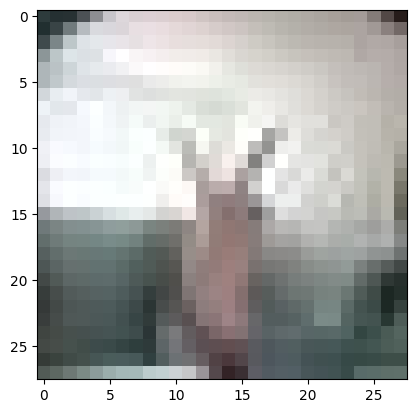

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

#**2. 딥러닝 네트워크 설계**

In [73]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
n_channel_1 = 16
n_channel_2 = 32
n_dense = 64
n_train_epoch = 20

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 26, 26, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,547 (220.89 KB)

 Trainable params: 56,547 (220.89 KB)

 Non-trainable params: 0 (0.00 B)

#**3. 딥러닝 네트워크 학습**

In [74]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.2974 - loss: 52.8422
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3322 - loss: 4.9060
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5995 - loss: 1.0003
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8575 - loss: 0.3849
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9446 - loss: 0.1821
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9912 - loss: 0.1064
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9944 - loss: 0.0744
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9991 - loss: 0.0296
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9966 - loss: 0.0262
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 1.0000 - loss: 0.0175
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 0.0126
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy

#**4. 성능 테스트**

In [75]:
# 💡 코랩 환경의 기본 경로로 수정
base_test_dir = "/content/rock_scissor_paper/test"

# 가위 이미지 리사이즈
image_dir_path_scissor = base_test_dir + "/scissor"
resize_images(image_dir_path_scissor)

# 바위 이미지 리사이즈
image_dir_path_rock = base_test_dir + "/rock"
resize_images(image_dir_path_rock)

# 보 이미지 리사이즈
image_dir_path_paper = base_test_dir + "/paper"
resize_images(image_dir_path_paper)

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


In [76]:
# load_data 함수 호출
image_dir_path_test = base_test_dir # /content/rock_scissor_paper/test
(x_test, y_test)=load_data(image_dir_path_test)

# 정규화
x_test_norm = x_test.astype('float32') / 255.0

print("학습데이터(x_test)의 이미지 개수는", len(x_test_norm), "입니다.")
print("x_test shape: {}".format(x_test_norm.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
학습데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [77]:
# 훈련시킨 moel을 사용해 test_accuracy 측정
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - 22ms/step - accuracy: 0.5000 - loss: 4.9589
test_loss: 4.958883285522461 
test_accuracy: 0.5


###**[n_channel_1 = 32 | n_channel_2 = 32 | n_dense = 64 | n_train_epoch = 10]**

10/10 - 0s - 25ms/step - accuracy: 0.3067 - loss: 3.8707

test_loss: 3.8707115650177

test_accuracy: 0.30666667222976685

###**[n_channel_1 = 32 | n_channel_2 = 64 | n_dense = 64 | n_train_epoch = 20]**

10/10 - 0s - 24ms/step - accuracy: 0.3333 - loss: 4.1523

test_loss: 4.15231466293335

test_accuracy: 0.3333333432674408

###**[n_channel_1 = 64 | n_channel_2 = 128 | n_dense = 128 | n_train_epoch = 10]**

10/10 - 0s - 32ms/step - accuracy: 0.3333 - loss: 5.8722

test_loss: 5.872228622436523

test_accuracy: 0.3333333432674408

###**[n_channel_1 = 16 | n_channel_2 = 32 | n_dense = 64 | n_train_epoch = 10]**

10/10 - 0s - 24ms/step - accuracy: 0.4467 - loss: 2.7745

test_loss: 2.7744665145874023

test_accuracy: 0.4466666579246521

###**[n_channel_1 = 16 | n_channel_2 = 32 | n_dense = 64 | n_train_epoch = 20]**

10/10 - 0s - 22ms/step - accuracy: 0.5000 - loss: 4.9589

test_loss: 4.958883285522461

test_accuracy: 0.5

###**[n_channel_1=16 | n_channel_2=32 | n_dense=32 | n_train_epoch=10 (노드에 제시된 파라미터)로 돌린 결과]**

10/10 - 0s - 36ms/step - accuracy: 0.5200 - loss: 1.1341

test_loss: 1.1341328620910645

test_accuracy: 0.5199999809265137

###**[n_channel_1 = 32 | n_channel_2 = 64 | n_dense = 64 | n_train_epoch = 10]**

10/10 - 0s - 25ms/step - accuracy: 0.6500 - loss: 1.1109

test_loss: 1.1109294891357422

test_accuracy: 0.6499999761581421